# Inpainting with homogeneous diffusion 
We will use the inpainting with Homogeneous diffusion to interpolate in a grid. The method is described in https://arxiv.org/pdf/1506.04566.pdf. We consider the following PDE with mixed boundary conditions
$$\begin{align}
\nabla u &= 0 \text{ on } \Omega \setminus \Omega_{K}\,, \\
u &= f  \text{ on } \Omega_K \,, \\
\partial_n u &= 0 \text{ on } \partial \Omega \setminus \partial \Omega_K\,.
\end{align}$$

Here $ \partial_n u $ denotes the outward normal.

We will now try to use Laplace interpolation on an 1D problem. We will use the following function:

$f(x) = \exp{(2x -3)} + x\,,\quad x\in [-4, 4]\, $.

In [102]:
using Laplacians, LinearAlgebra, SparseArrays
using TestImages, Colors, Plots, FileIO

In [103]:
x_array = -4:0.08:4;
x_array = collect(x_array);
N = length(x_array);
f_array = exp.(2*x_array .- 3) + x_array;
discard = rand(2:100, 30);
discard = unique(discard);
all = collect(1:length(x_array));
keep = setdiff(all, discard);
length(keep);

In [104]:
#Constructing the Laplace matrix
h = 0.08;
ev = 1/h^2*ones(N-1,1);
dv = -ones(N,1)*2/h^2
A = Tridiagonal([fill(1.0/h^2, N-2); 0.0], [1.0; fill(-2.0/h^2, N-2); 1.0], [0.0; fill(1.0/h^2, N-2);]);

In [105]:
#Constructing C
diag_c = ones(N);
diag_c[discard] .= 0;
C = diagm(diag_c);
Id = Matrix(1.0I, N,N);

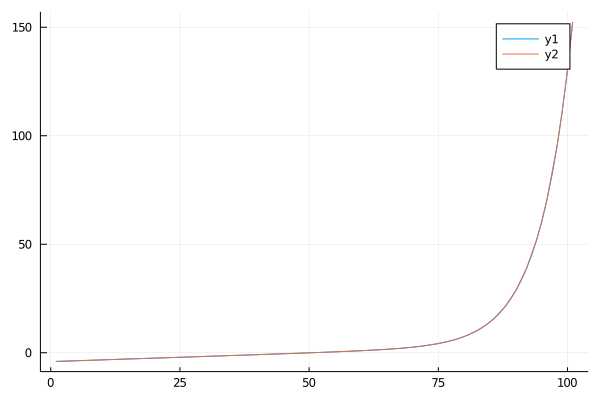

In [106]:
u = (C-(Id -C)*A)\(C*f_array);
pa = plot(f_array)
plot!(pa, u)


In [107]:
#Verifying if the second derivative at the discarded points is 0
(A*u)[discard]

25-element Array{Float64,1}:
 -2.842170943040401e-14
  0.0
  0.0
  5.684341886080802e-14
  0.0
  0.0
  0.0
 -7.105427357601002e-15
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  1.4210854715202004e-14
  0.0
  0.0
  0.0